In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-energy-consumption/est_hourly.paruqet
/kaggle/input/hourly-energy-consumption/DOM_hourly.csv
/kaggle/input/hourly-energy-consumption/EKPC_hourly.csv
/kaggle/input/hourly-energy-consumption/DUQ_hourly.csv
/kaggle/input/hourly-energy-consumption/DAYTON_hourly.csv
/kaggle/input/hourly-energy-consumption/PJME_hourly.csv
/kaggle/input/hourly-energy-consumption/PJM_Load_hourly.csv
/kaggle/input/hourly-energy-consumption/NI_hourly.csv
/kaggle/input/hourly-energy-consumption/FE_hourly.csv
/kaggle/input/hourly-energy-consumption/COMED_hourly.csv
/kaggle/input/hourly-energy-consumption/AEP_hourly.csv
/kaggle/input/hourly-energy-consumption/pjm_hourly_est.csv
/kaggle/input/hourly-energy-consumption/DEOK_hourly.csv
/kaggle/input/hourly-energy-consumption/PJMW_hourly.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/kaggle/input/hourly-energy-consumption/PJME_hourly.csv')

In [4]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [6]:
df['Datetime']=pd.to_datetime(df['Datetime'])

In [7]:
df.set_index('Datetime',inplace=True)

In [8]:
df.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


In [9]:
df_new = df.loc[(df.index >= "2012-01-01") & (df.index < "2018-01-01")]

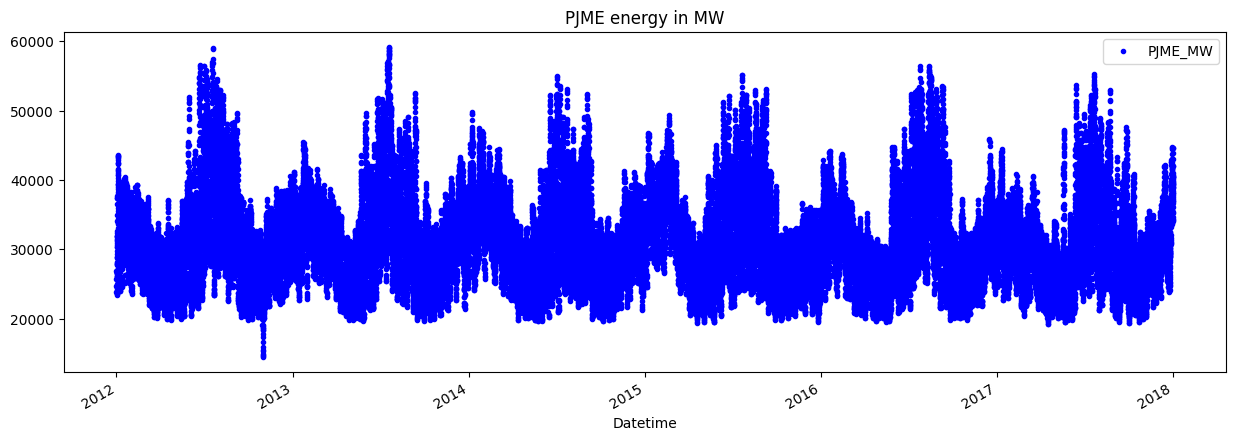

In [10]:
df_new.plot(style='.',figsize=(15,5), color='blue',title='PJME energy in MW')

plt.show()

In [11]:
train = df_new.loc[df_new.index <'2016-01-01']
test = df_new.loc[df_new.index >= '2016-01-01']

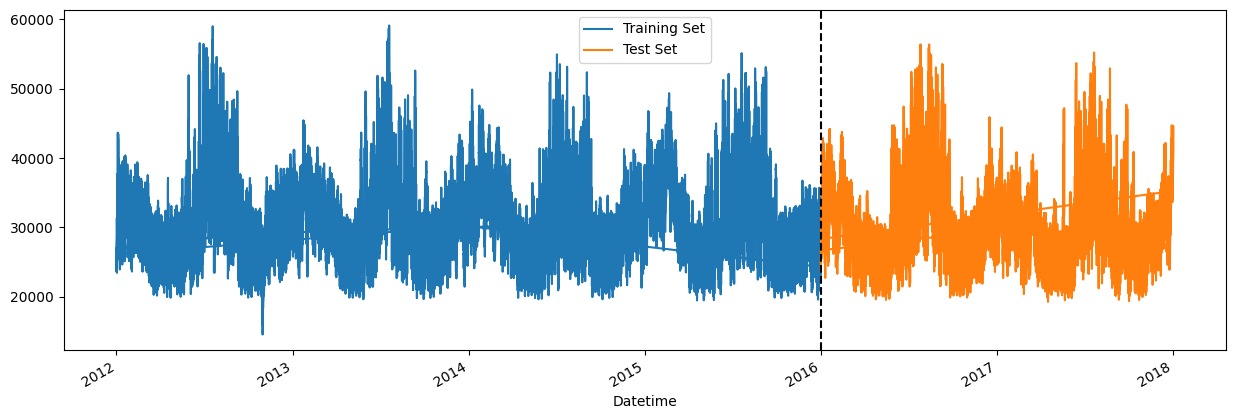

In [12]:
fig, ax = plt.subplots(figsize=(15,5))

train.plot(ax=ax, label='Training Set')
test.plot(ax=ax, label='Test Set')
ax.axvline('2016-01-01', ls='--', color='black')
ax.legend(['Training Set', 'Test Set'])
plt.show()

### Feature Creation

In [13]:
def create_features(df):
   
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df_new = create_features(df_new)

In [14]:
# df_new

In [15]:
df_new.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

In [16]:
train = create_features(train)
test = create_features(test)

features = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear']
Target = ['PJME_MW']

In [17]:
X_train = train[features]
y_train = train[Target]

X_test = test[features]
y_test = test[Target]

#### Model

In [18]:
reg=xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)
reg.fit(X_train, y_train,
       eval_set = [(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:5068.28426	validation_1-rmse:5338.42979
[1]	validation_0-rmse:4239.59673	validation_1-rmse:4749.06047
[2]	validation_0-rmse:3701.56834	validation_1-rmse:4490.84885
[3]	validation_0-rmse:3355.94797	validation_1-rmse:4306.31710
[4]	validation_0-rmse:3153.06171	validation_1-rmse:4214.25645
[5]	validation_0-rmse:3009.38856	validation_1-rmse:4160.64867
[6]	validation_0-rmse:2901.76578	validation_1-rmse:4135.13750
[7]	validation_0-rmse:2818.46063	validation_1-rmse:4108.27433
[8]	validation_0-rmse:2744.94593	validation_1-rmse:4123.80205
[9]	validation_0-rmse:2685.91748	validation_1-rmse:4117.91595
[10]	validation_0-rmse:2618.83041	validation_1-rmse:4149.66475
[11]	validation_0-rmse:2476.85027	validation_1-rmse:4168.05149
[12]	validation_0-rmse:2427.34464	validation_1-rmse:4179.19957
[13]	validation_0-rmse:2386.90308	validation_1-rmse:4180.35118
[14]	validation_0-rmse:2360.02927	validation_1-rmse:4177.88687
[15]	validation_0-rmse:2336.36583	validation_1-rmse:4191.44430
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Feature Importance

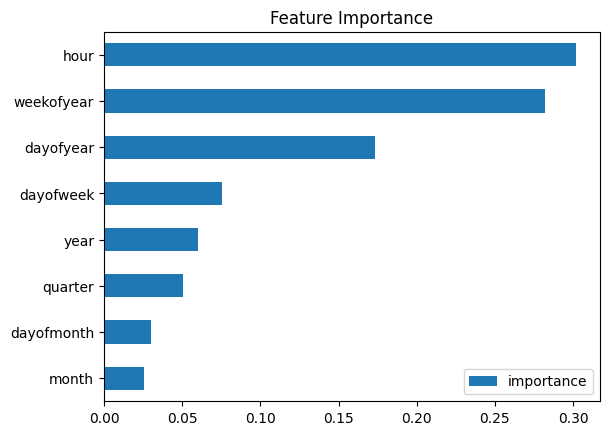

In [19]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [20]:
test['predictions']=reg.predict(X_test)

In [21]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['predictions']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 4108.27
